In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import pathlib
import copy
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.convolution
import kgpy.observatories

 ChiantiPy version 0.11.0 
 found PyQt5 widgets
 using PyQt5 widgets


In [3]:
folder_input = pathlib.Path(r'C:\Users\byrdie\Kankelborg-Group\iris_planning\iris_planning\week_2021_09_20\hop_307\ar12738\data')

In [4]:
files = sorted(folder_input.glob('*raster*.gz'))
file = files[9]
file

WindowsPath('C:/Users/byrdie/Kankelborg-Group/iris_planning/iris_planning/week_2021_09_20/hop_307/ar12738/data/iris_l2_20190416_133808_3620108077_raster.tar.gz')

In [5]:
file

WindowsPath('C:/Users/byrdie/Kankelborg-Group/iris_planning/iris_planning/week_2021_09_20/hop_307/ar12738/data/iris_l2_20190416_133808_3620108077_raster.tar.gz')

In [6]:
cube = kgpy.observatories.iris.spectrograph.Cube.from_archive(file)
cube.intensity = cube.intensity[:, :, :, 11:534]
cube.intensity = np.nan_to_num(cube.intensity)
cube.intensity = cube.intensity_despiked

ax -3
k_sh (5, 3, 3)
axis (2, 3, 4)
axis_orthogonal (0, 1)


C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\img\spikes.py:179: RuntimeWarning: invalid value encountered in true_divide
  hist /= hist_sum


ax -2
k_sh (3, 5, 3)
axis (2, 3, 4)
axis_orthogonal (0, 1)


C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\img\spikes.py:179: RuntimeWarning: invalid value encountered in true_divide
  hist /= hist_sum


ax -1
k_sh (3, 3, 5)
axis (2, 3, 4)
axis_orthogonal (0, 1)


C:\Users\byrdie\Kankelborg-Group\kgpy\kgpy\img\spikes.py:179: RuntimeWarning: invalid value encountered in true_divide
  hist /= hist_sum


In [7]:
index_image = 1

<IPython.core.display.Javascript object>


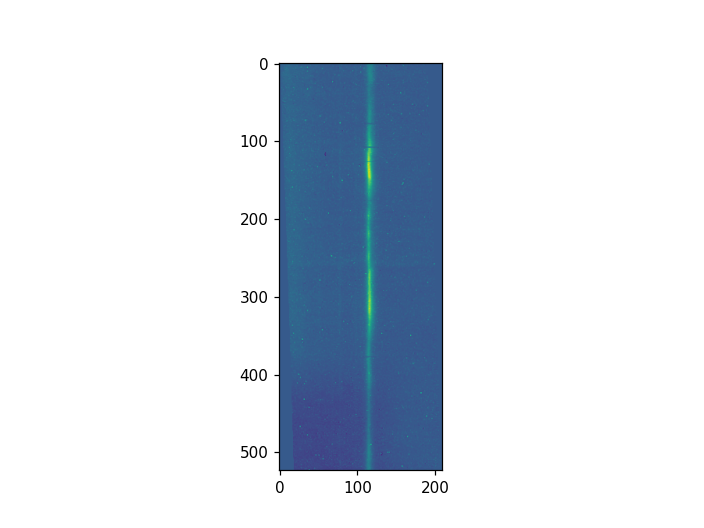

In [8]:
plt.figure()
plt.imshow(np.median(cube.intensity, (0, 1, 2)))

In [9]:
mask_vertical = np.ones(cube.intensity.shape[~1], dtype=bool)
mask_vertical[77] = False
mask_vertical[107] = False
mask_vertical[108] = False
mask_vertical[377] = False
mask_vertical[378] = False

cube_fixed = copy.copy(cube)

cube_fixed.intensity = np.nan_to_num(cube.intensity)


mask_vertical = np.broadcast_to(mask_vertical[..., np.newaxis], cube_fixed.intensity.shape).copy()
mask_vertical[:, :, :, 236, 107] = False
mask_vertical[:, :, :, 236, 108] = False

cube_fixed.intensity[~mask_vertical] = 0

filter_size = 5
intensity_filtered = scipy.ndimage.uniform_filter1d(cube_fixed.intensity, size=filter_size, axis=~1)
intensity_filtered = intensity_filtered / scipy.ndimage.uniform_filter1d(mask_vertical.astype(float), size=filter_size, axis=~1)

# cube_fixed.intensity = intensity_filtered
# cube_fixed.intensity[index_image, 0] = astropy.convolution.interpolate_replace_nans(
#     array=cube_fixed.intensity[index_image, 0],
#     kernel=np.ones((1, 5, 1)),
# )
cube_fixed.intensity.value[~mask_vertical] = intensity_filtered[~mask_vertical]

In [10]:
cube.intensity.shape

(5, 1, 320, 523, 210)

In [11]:
colors = cube_fixed.colors(60 * u.km / u.s)
colors = colors - 0.
colors = colors[:, 0]
colors = np.moveaxis(colors, 1, 2)

c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
c:\users\byrdie\appdata\local\programs\python\python38\lib\site-packages\astropy\units\quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<IPython.core.display.Javascript object>


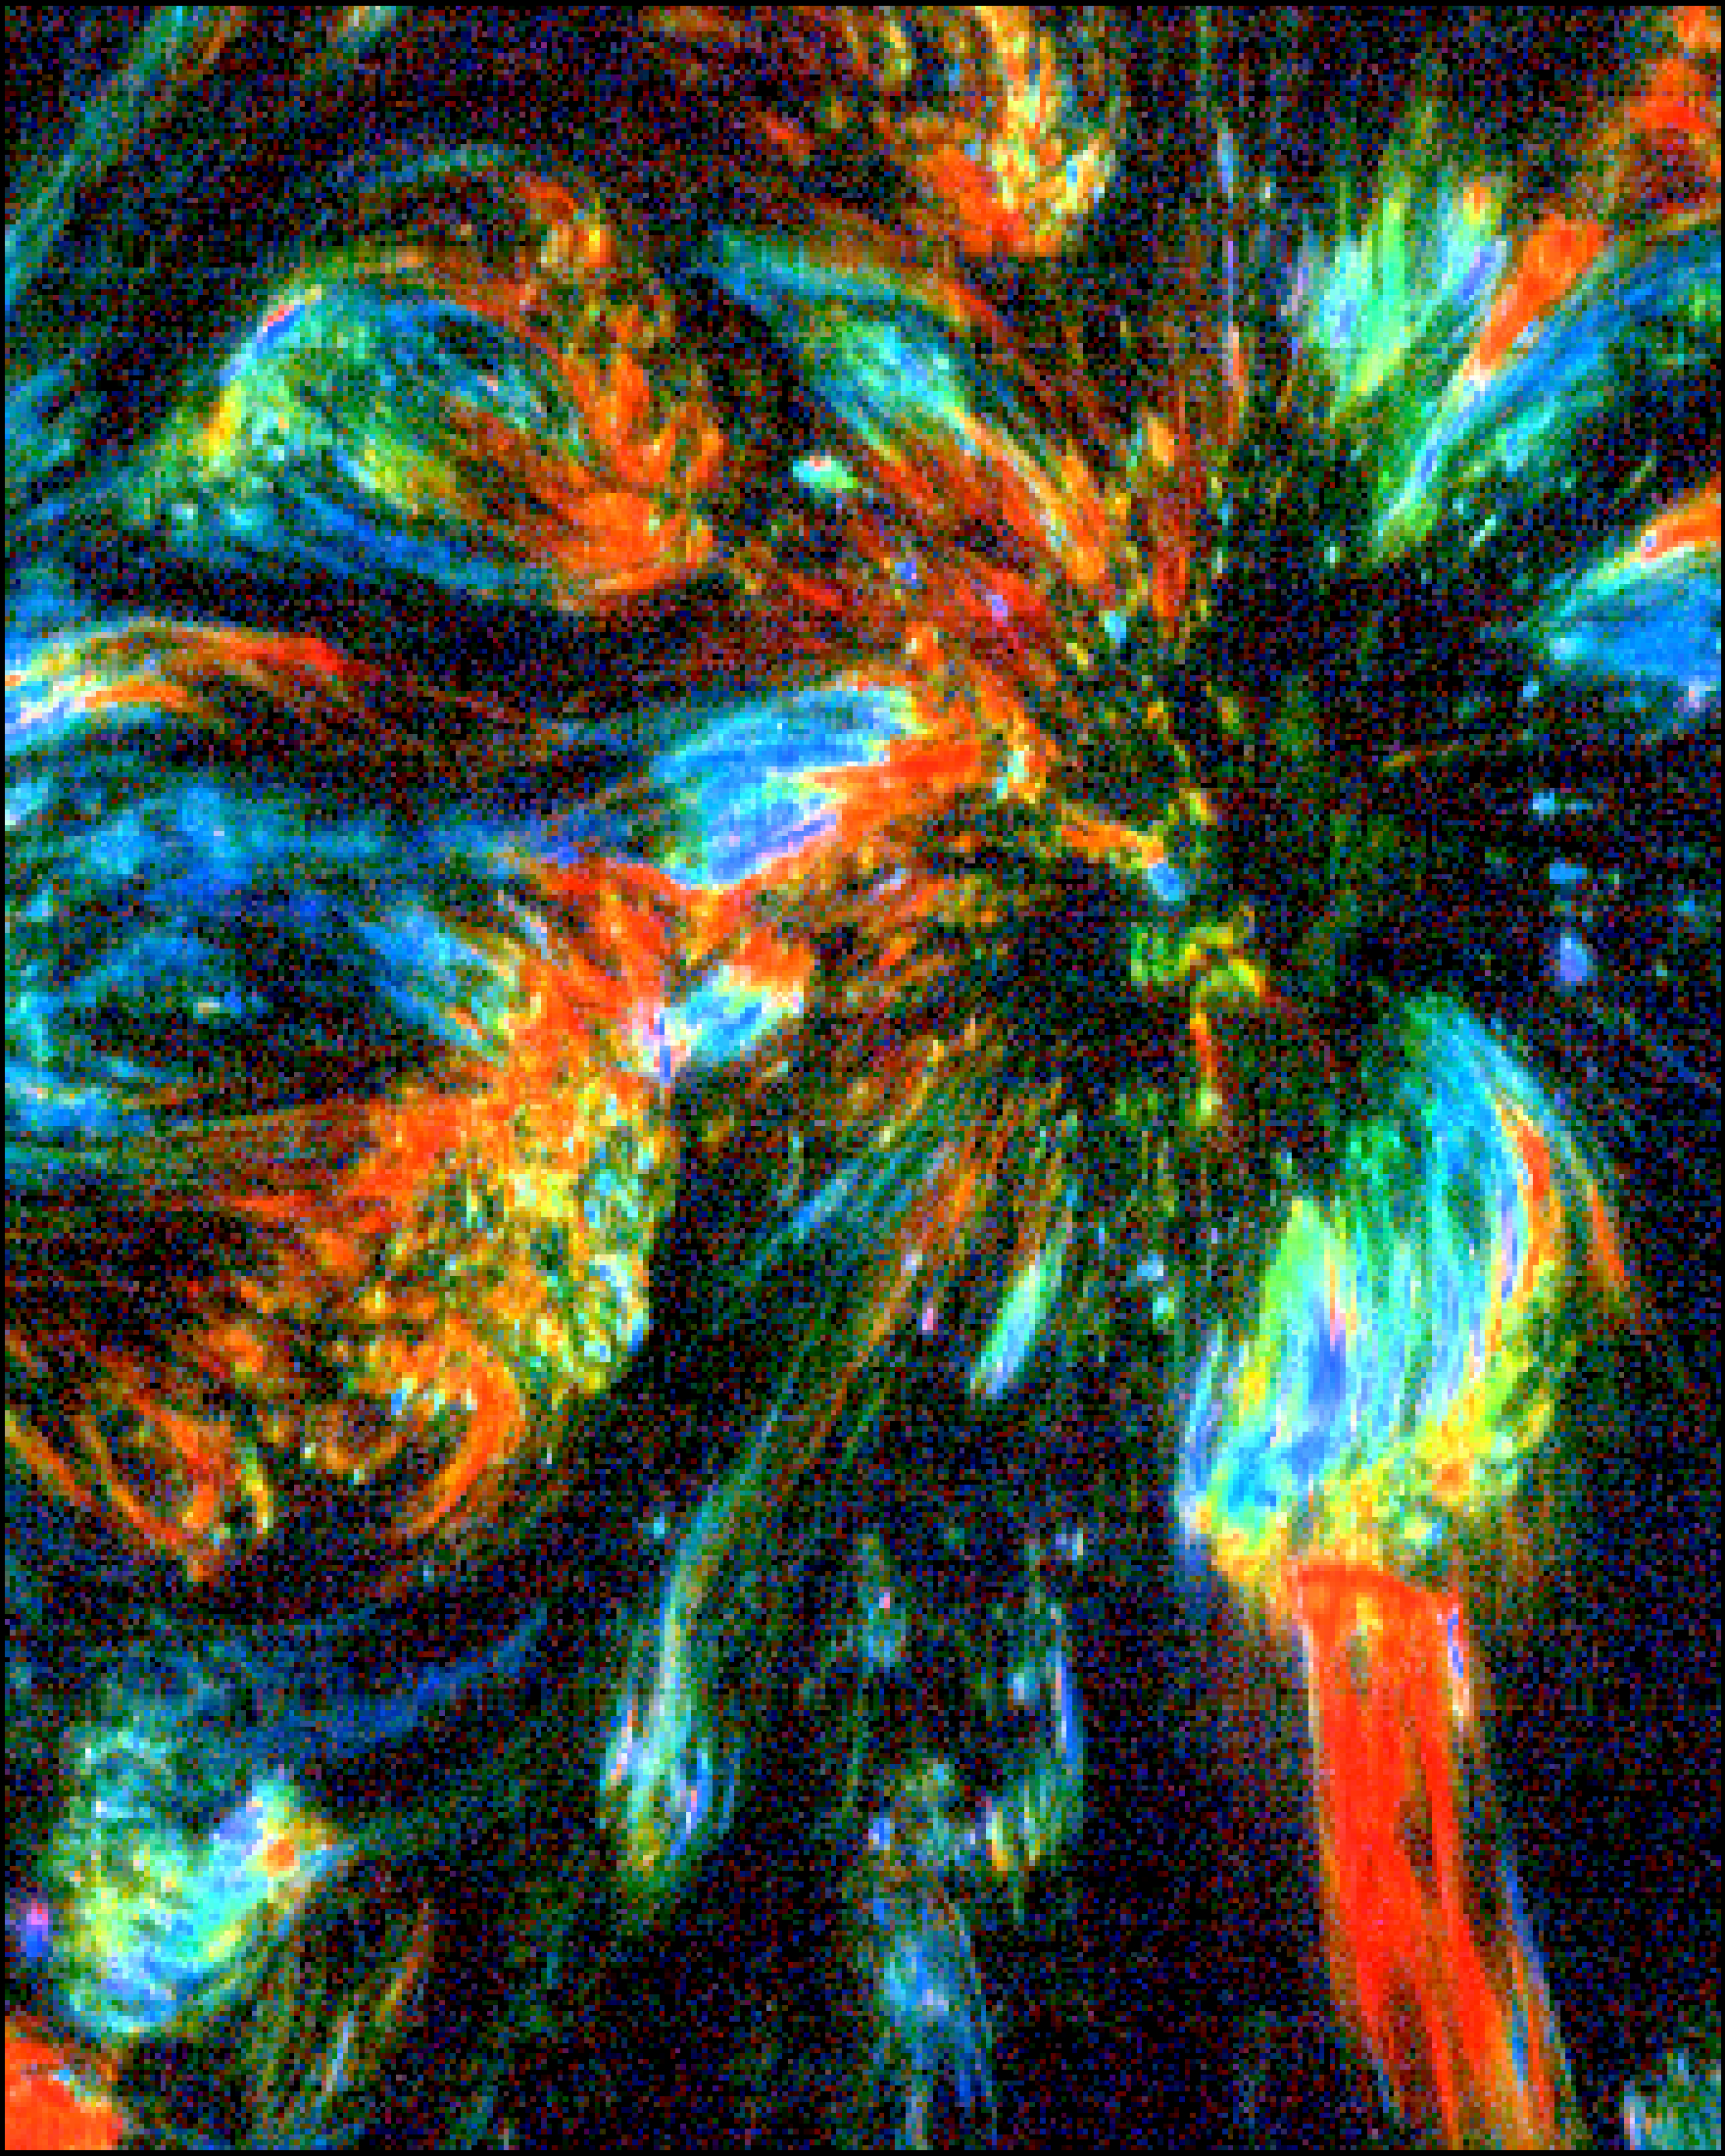

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [12]:
# image = colors[index_image, 82:~40, :, :]
image = colors[index_image, 62:~60, :, :]

image_width = 16
image_height = 20


# image_height = image_width * image.shape[0] / image.shape[1]

fig, ax = plt.subplots(
#     figsize=(12, 16), 
    figsize=(image_width, image_height),
    constrained_layout=True,
)
fig.set_facecolor('black')
ax.set_axis_off()
ax.set_facecolor('black')
ax.imshow(
    X=image,
#     interpolation='bicubic',
)
fig.savefig('science_art_bzn_2022_smart.png', bbox_inches='tight', pad_inches=0, dpi=300)

In [13]:
image_height

20

In [14]:
image.shape[1] * image_height / image_width

400.0

In [15]:
image.shape[0]

400

In [16]:
16/12

1.3333333333333333

In [17]:
20/16

1.25